In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 347s 2us/step


In [3]:
print('Shape:')
print('X_train:', str(X_train.shape))
print('Y_train:', str(y_train.shape))
print('X_test:', str(X_test.shape))
print('Y_test:', str(y_test.shape))

print('Unique label of images')
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# compute the number of labels
num_labels = len(unique)
print('Number of unique labels', num_labels)

Shape:
X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test: (10000, 32, 32, 3)
Y_test: (10000, 1)
Unique label of images
Train labels:  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
Number of unique labels 10


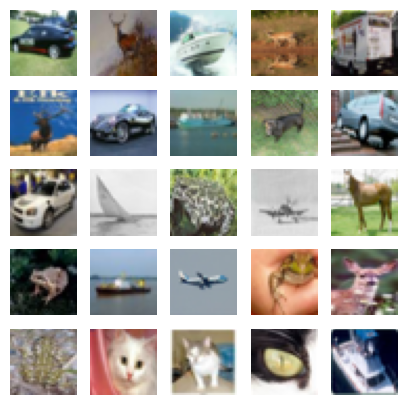

In [4]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:

# example of a 3-block vgg style architecture
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))


# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())

# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(num_labels, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
batch_size = 256
hidden_units = 256
model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
196/196 [==============================] - 302s 2s/step - loss: 0.6790 - accuracy: 0.7627
Epoch 2/10
196/196 [==============================] - 308s 2s/step - loss: 0.5082 - accuracy: 0.8218
Epoch 3/10
196/196 [==============================] - 1860s 10s/step - loss: 0.3715 - accuracy: 0.8711
Epoch 4/10
196/196 [==============================] - 304s 2s/step - loss: 0.2603 - accuracy: 0.9103
Epoch 5/10
196/196 [==============================] - 302s 2s/step - loss: 0.1673 - accuracy: 0.9441
Epoch 6/10
196/196 [==============================] - 296s 2s/step - loss: 0.1168 - accuracy: 0.9615
Epoch 7/10
196/196 [==============================] - 298s 2s/step - loss: 0.0870 - accuracy: 0.9712
Epoch 8/10
196/196 [==============================] - 301s 2s/step - loss: 0.0806 - accuracy: 0.9727
Epoch 9/10
196/196 [==============================] - 303s 2s/step - loss: 0.0707 - accuracy: 0.9764
Epoch 10/10
196/196 [==============================] - 354s 2s/step - loss: 0.0458 - accu

In [18]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Accuracy:', (100.0 * acc))

40/40 [==============================] - 19s 461ms/step - loss: 1.1392 - accuracy: 0.7615
Accuracy: 76.15000009536743
